In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from keras.optimizers import SGD
import numpy as np

In [66]:
data = tf.keras.datasets.mnist


In [67]:
(x_train,y_train),(x_test,y_test) = data.load_data()

In [68]:
x_train.shape

(60000, 28, 28)

In [69]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [70]:
x_train=x_train/255.0
x_test = x_test/255.0

In [71]:
x_train.shape


(60000, 28, 28)

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [73]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6258 - accuracy: 0.8443 - val_loss: 0.3526 - val_accuracy: 0.9035
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.9061 - val_loss: 0.2919 - val_accuracy: 0.9189
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2883 - accuracy: 0.9184 - val_loss: 0.2598 - val_accuracy: 0.9274


In [75]:
loss,accuracy = model.evaluate(x_test,y_test)

model.summary
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2598 - accuracy: 0.9274
Loss : 0.259831964969635
Accuracy : 0.9273999929428101


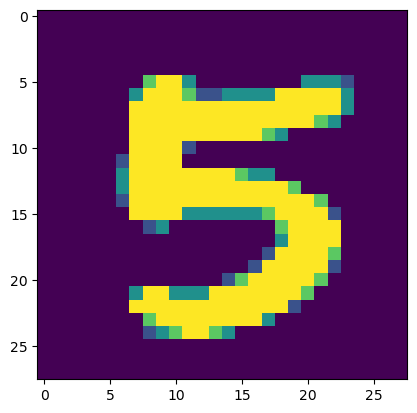

313/313 [==============================] - 1s 2ms/step
Probability values: [1.4324376e-04 1.6102708e-09 1.6083656e-06 4.0064109e-03 2.0201533e-06
 9.9545646e-01 2.1068333e-07 1.4494914e-06 3.3789122e-04 5.0657272e-05]
Predicted Value: 5


In [76]:
n = random.randint(0,len(x_test))
plt.imshow(x_test[n])
plt.show()

predicted = model.predict(x_test)
print("Probability values:",predicted[n])
print(f"Predicted Value: {np.argmax(predicted[n])}")

<function matplotlib.pyplot.show(close=None, block=None)>

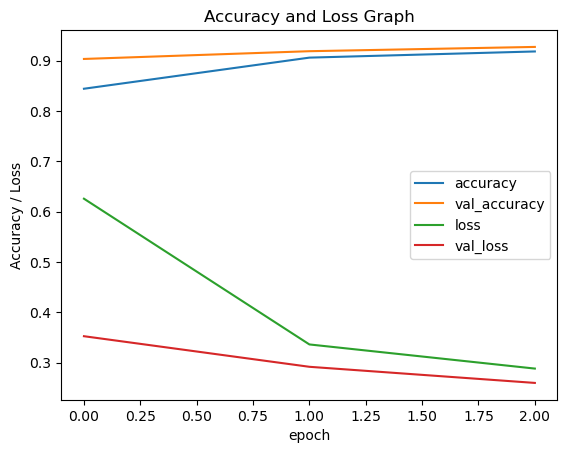

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Accuracy and Loss Graph")
plt.xlabel("epoch")
plt.ylabel("Accuracy / Loss")
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show